# Lets try to get the price of car using Regression algorithm

Lets start witgh importing the libarries needed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ('Imported pandas,numpy and matplotlib')

Imported pandas,numpy and matplotlib


Pandas and numpy will be used for our mathemetical models while matplotlib will be used for plotting.

Let's read our data and visualise it.

In [3]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


df.head() will give us the details fo top 5 rows of every cooloumn. We can use df.tail() to get the last 5 rows and similiary df.head(10) to  get top 10 rows.

The data is about cars and we need to predict the price of car using the above data

We will be using Linear regression to get the rpice of the car.For this we wil be using Linear regression. Linear regression works on one independent value to predict the value of dependent variable.In this case the independent value can be any coloumn while the predicted value should be price.

Simpel Linear Regression
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

In this case a is the intrcept value and b is the slope(coef) value

# Lets load the modules for linear regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
#Create a linera regression Object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will take highway-mpg to check how it effects the price of the car

In [6]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# we will predict the price of 5 cars 
Yhat=lm.predict(X)
Yhat[0:5]  


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

find the value of intercept(intercept_) and slope(coef_)

In [10]:
lm.intercept_


38423.305858157386

In [11]:
lm.coef_

array([-821.73337832])

Putting this on equation 


price = 38423.31 - 821.73 x highway-mpg

Now lets check if the value we have received correctly matches with the actual values. How our model is performing will be clear from the graph

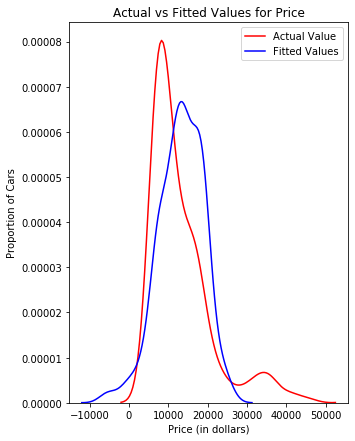

In [17]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows the model is not a great fit

(0, 48173.26637991229)

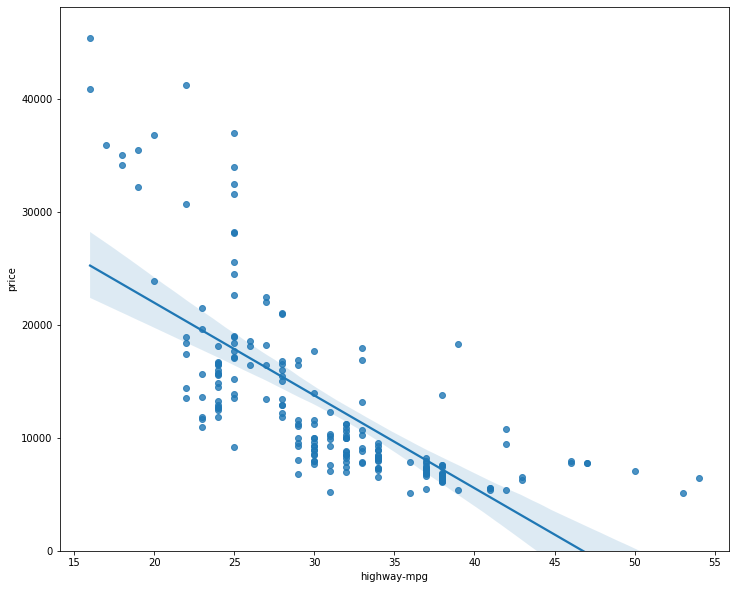

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Lets try Linear regression with another value city-mpg

In [19]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
X1 = df[['city-mpg']]
Y1 = df['price']
lm1.fit(X1,Y1)
Yhat1=lm1.predict(X1)
Yhat1[0:5] 

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381,
       19305.44280105])

In [24]:
#Intercept value and coef value
lm1.intercept_


34595.600842778265

In [25]:
lm1.coef_

array([-849.45322454])

Lets see the graph of the values

(0, 48247.4975298212)

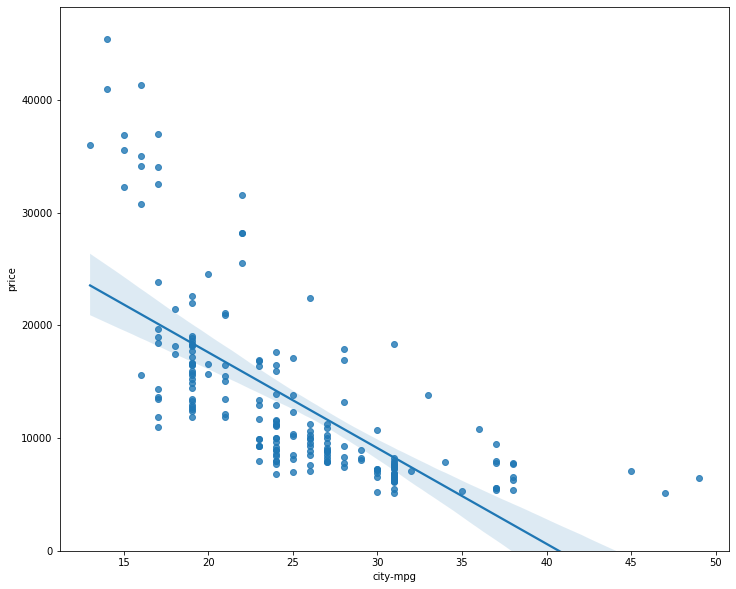

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

Actual and fitted value difference

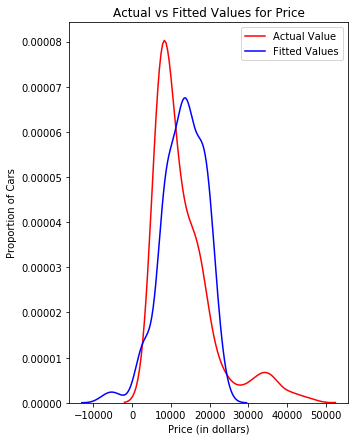

In [30]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows city-mpg and highway-mpg has alsmost similar result

Lets see out of the two which is storngly related to the price 

In [32]:
df[["city-mpg","horsepower","highway-mpg","price"]].corr()

,city-mpg,horsepower,highway-mpg,price
city-mpg,1.000000,-0.822214,0.972044,-0.686571
horsepower,-0.822214,1.000000,-0.804575,0.809575
highway-mpg,0.972044,-0.804575,1.000000,-0.704692
price,-0.686571,0.809575,-0.704692,1.000000


As per the figure horsepower is strongly replated. Lets try our model with horsepower value

In [33]:
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
X2 = df[['horsepower']]
Y2 = df['price']
lm2.fit(X2,Y2)
Yhat2=lm2.predict(X2)
Yhat2[0:5] 

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

In [37]:
lm2.coef_

array([172.18312191])

In [38]:
lm2.intercept_

-4597.558297892912

(0, 47542.5471653552)

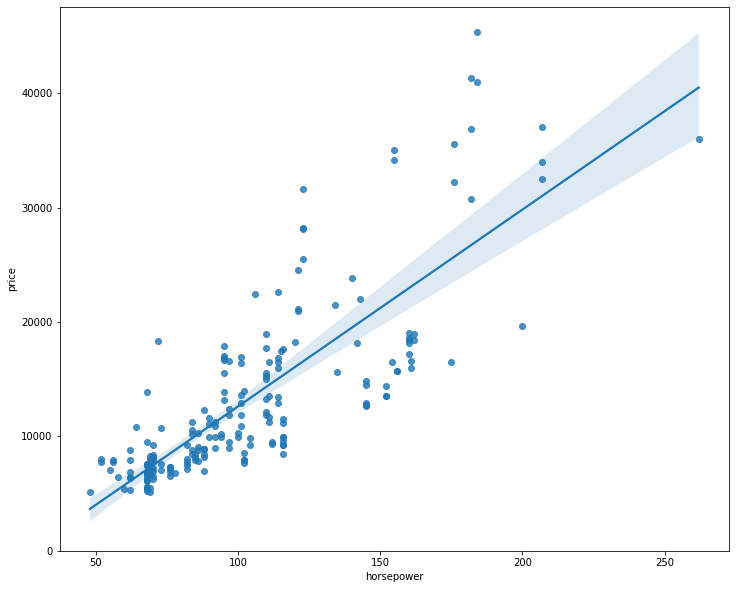

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

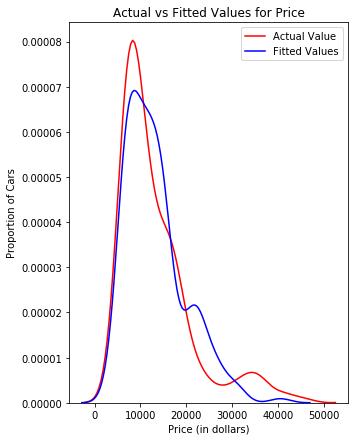

In [42]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax2 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax2)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The above graph shows horsepower has a greater corelation with the price